In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"premsai8938","key":"9f13642af14f2d6066e88f3d3ee0bf8f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d bmadushanirodrigo/fracture-multi-region-x-ray-data

Dataset URL: https://www.kaggle.com/datasets/bmadushanirodrigo/fracture-multi-region-x-ray-data
License(s): ODC Public Domain Dedication and Licence (PDDL)
 99% 477M/481M [00:03<00:00, 217MB/s]
100% 481M/481M [00:03<00:00, 165MB/s]


In [ ]:
!unzip fracture-multi-region-x-ray-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3 (1).jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3-rotated1 (1).jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3-rotated1.jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3.jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2.jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated3 (1).jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("/content/Bone_Fracture_Binary_Classification"):
    print(f"{dirpath} - {dirnames} - {len(filenames)}")

/content/Bone_Fracture_Binary_Classification - ['Bone_Fracture_Binary_Classification'] - 0
/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification - ['train', 'val', 'test'] - 0
/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train - ['fractured', 'not fractured'] - 0
/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured - [] - 4606
/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured - [] - 4640
/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val - ['fractured', 'not fractured'] - 0
/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/fractured - [] - 337
/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured - [] - 492
/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test - ['fractured', 'not fractu

In [ ]:
train_dir = "/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train"
test_dir = "/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test"
val_dir = "/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val"

In [ ]:
import random
from matplotlib.image import imread
import matplotlib.pyplot as plt
def Display_Images(target_dir,target_class):
  target_file = target_dir + "/" + target_class
  random_image = random.sample(os.listdir(target_file),1)
  img = imread(target_file + "/" + random_image[0])
  print(random_image)
  print("Image Shape : ", img.shape)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

['9-rotated2-rotated1-rotated2 - Copy (1).jpg']
Image Shape :  (224, 224, 3)
['16-rotated3-rotated2.jpg']
Image Shape :  (224, 224, 3)


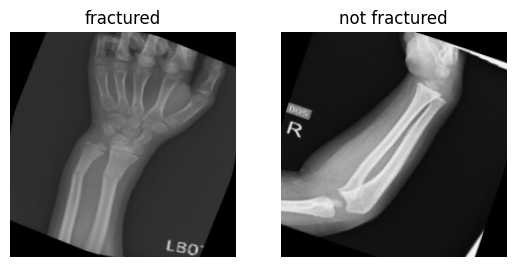

In [ ]:
plt.figure()
plt.subplot(1,2,1)
Display_Images(train_dir,"fractured")
plt.subplot(1,2,2)
Display_Images(train_dir,"not fractured")

In [ ]:
class_names = os.listdir(train_dir)
class_names

['fractured', 'not fractured']

#### Already data agumentation is done no need to do the data agumentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(1./255)
test_datagen = ImageDataGenerator(1/255.)
val_datagen = ImageDataGenerator(1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224),class_mode="binary",batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,target_size=(224,224),class_mode="binary",batch_size=32)
val_data = val_datagen.flow_from_directory(val_dir,target_size=(224,224),class_mode="binary",batch_size=32)

Found 9246 images belonging to 2 classes.
Found 506 images belonging to 2 classes.
Found 829 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from PIL import ImageFile

In [ ]:
## Allowing the truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=val_data,validation_steps=len(val_data))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


288/289 [============================>.] - ETA: 0s - loss: 1.2962 - accuracy: 0.8143

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


289/289 [==============================] - 31s 102ms/step - loss: 1.2919 - accuracy: 0.8149 - val_loss: 0.2729 - val_accuracy: 0.8926
Epoch 2/5
289/289 [==============================] - 28s 95ms/step - loss: 0.0918 - accuracy: 0.9707 - val_loss: 0.2738 - val_accuracy: 0.9276
Epoch 3/5
289/289 [==============================] - 28s 97ms/step - loss: 0.0359 - accuracy: 0.9907 - val_loss: 0.2077 - val_accuracy: 0.9602
Epoch 4/5
289/289 [==============================] - 28s 97ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.2475 - val_accuracy: 0.9662
Epoch 5/5
289/289 [==============================] - 28s 96ms/step - loss: 0.0323 - accuracy: 0.9881 - val_loss: 0.3606 - val_accuracy: 0.9409


In [ ]:
x = model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


16/16 [==============================] - 5s 271ms/step


In [ ]:
images , labels = test_data.next()

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
pred_1 = model.predict(images)

1/1 [==============================] - 0s 102ms/step


In [ ]:
for i in range(len(labels)):
    print(f"{tf.round(labels[i]) == tf.round(pred_1[i])} : {i}")

[ True] : 0
[ True] : 1
[ True] : 2
[ True] : 3
[ True] : 4
[ True] : 5
[ True] : 6
[ True] : 7
[ True] : 8
[ True] : 9
[ True] : 10
[False] : 11
[ True] : 12
[ True] : 13
[ True] : 14
[ True] : 15
[ True] : 16
[ True] : 17
[ True] : 18
[ True] : 19
[ True] : 20
[ True] : 21
[ True] : 22
[ True] : 23
[ True] : 24
[ True] : 25
[ True] : 26
[False] : 27
[ True] : 28
[ True] : 29
[ True] : 30
[ True] : 31


### Without allowing truncated images

In [ ]:
!pip install Pillow

In [ ]:
from PIL import Image
def check_truncated_images(directory):
  for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    try:
        Image.open(filepath).load()
    except OSError as e:
      if "truncated" in str(e):
        print(f"Truncated image found: {filepath}")
        # Remove the truncated image
        os.remove(filepath)

In [ ]:
## Removing Truncated images in train folder for fractured
check_truncated_images("/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured")

In [ ]:
## Removing Truncated images in train folder for not fractured
check_truncated_images("/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured")

Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004148.jpg
Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004149.jpg
Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004143.jpg
Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004347.jpg
Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004308.jpg
Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004134.jpg


In [ ]:
## Removing Truncated images in test folder for fractured
check_truncated_images("/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/fractured")

In [ ]:
## Removing Truncated images in test folder for not fractured
check_truncated_images("/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured")

Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004148.jpg
Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004149.jpg
Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004143.jpg
Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004347.jpg
Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004308.jpg
Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004134.jpg


In [ ]:
# Removing Truncated images in val folder for fractured
check_truncated_images("/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/fractured")

In [ ]:
# Removing Truncated images in val folder for not fractured
check_truncated_images("/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured")

Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/IMG0004148.jpg
Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/IMG0004149.jpg
Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/IMG0004143.jpg
Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/IMG0004347.jpg
Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/IMG0004308.jpg
Truncated image found: /content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/IMG0004134.jpg


In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = False

In [ ]:
train_datagen_untruncated = ImageDataGenerator(1./255)
test_datagen_untruncated = ImageDataGenerator(1/255.)
val_datagen_untruncated = ImageDataGenerator(1/255.)

In [ ]:
train_data__untruncated = train_datagen_untruncated.flow_from_directory(train_dir,target_size=(224,224),class_mode="binary",batch_size=32)
test_data_untruncated = test_datagen_untruncated.flow_from_directory(test_dir,target_size=(224,224),class_mode="binary",batch_size=32)
val_data_untruncated = val_datagen_untruncated.flow_from_directory(val_dir,target_size=(224,224),class_mode="binary",batch_size=32)

Found 9234 images belonging to 2 classes.
Found 499 images belonging to 2 classes.
Found 817 images belonging to 2 classes.


In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_1.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_1 = model_1.fit(train_data__untruncated,epochs=5,steps_per_epoch=len(train_data__untruncated),validation_data=val_data_untruncated,validation_steps=len(val_data_untruncated))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


289/289 [==============================] - ETA: 0s - loss: 0.5038 - accuracy: 0.8705

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


289/289 [==============================] - 32s 105ms/step - loss: 0.5038 - accuracy: 0.8705 - val_loss: 0.1940 - val_accuracy: 0.9155
Epoch 2/5
289/289 [==============================] - 29s 100ms/step - loss: 0.0527 - accuracy: 0.9843 - val_loss: 0.1305 - val_accuracy: 0.9559
Epoch 3/5
289/289 [==============================] - 32s 112ms/step - loss: 0.0288 - accuracy: 0.9904 - val_loss: 0.2176 - val_accuracy: 0.9572
Epoch 4/5
289/289 [==============================] - 28s 95ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.1754 - val_accuracy: 0.9731
Epoch 5/5
289/289 [==============================] - 28s 96ms/step - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.1220 - val_accuracy: 0.9584


In [150]:
def load_preprocess(filename,img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img,[img_shape,img_shape])
  img = img / 255.
  return img

In [152]:
img = load_preprocess("/content/8.png")
img

<tf.Tensor: shape=(224, 224, 1), dtype=float32, numpy=
array([[[0.95686275],
        [0.95687634],
        [0.9606092 ],
        ...,
        [0.9573479 ],
        [0.95686275],
        [0.95686275]],

       [[0.9592398 ],
        [0.9569036 ],
        [0.9591541 ],
        ...,
        [0.95686275],
        [0.95686275],
        [0.95686275]],

       [[0.95686275],
        [0.95686275],
        [0.95686275],
        ...,
        [0.95686275],
        [0.95686275],
        [0.95686275]],

       ...,

       [[0.9607843 ],
        [0.9582082 ],
        [0.9607843 ],
        ...,
        [0.95686275],
        [0.95686275],
        [0.95688504]],

       [[0.9607493 ],
        [0.9607843 ],
        [0.96067727],
        ...,
        [0.957037  ],
        [0.95686275],
        [0.95686275]],

       [[0.9607798 ],
        [0.96067923],
        [0.9606092 ],
        ...,
        [0.95686275],
        [0.9569671 ],
        [0.96024597]]], dtype=float32)>